# linear regression - house price prediction
## batch wise gradient descent algorithm

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
df = pd.read_csv(R"HOUSE_DATA.CSV")
df.rename(columns={"SalePrice" : "PRICE","Id":"SIZE"},inplace = True)
df

,SIZE,PRICE
0,1461,123433.145425
1,1462,160657.198818
2,1463,185393.863809
3,1464,188304.008767
4,1465,192412.661184
...,...,...
1454,2915,86511.842682
1455,2916,90302.623092
1456,2917,170514.917302
1457,2918,120363.995549


In [2]:
x_train = np.array(df.iloc[:,0])
y_train = np.array(df.loc[:,"PRICE"])
m = len(x_train)
print(x_train,"\n",y_train,"\n",m)

[1461 1462 1463 ... 2917 2918 2919] 
 [123433.14542463 160657.19881783 185393.86380947 ... 170514.91730153
 120363.99554873 230962.82410691] 
 1459


In [3]:
def linear_model(x,w,b):
    y = np.zeros(m)
    total_cost = 0
    for i in range(m):
        y[i] = w*x[i]+b
        cost = (y[i] - y_train[i])**2
        total_cost += cost/2*m
    return y,total_cost

In [4]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = (1 / (2 * m)) * cost

    return total_cost

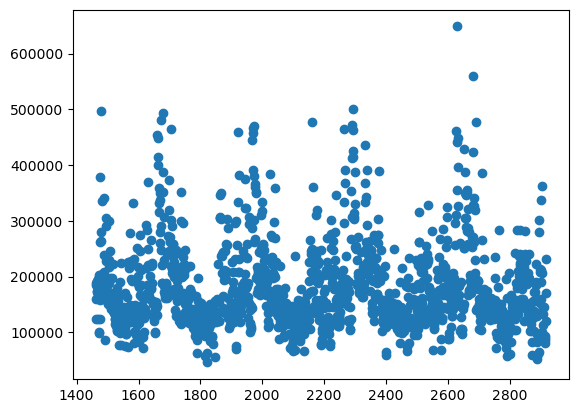

In [5]:
plt.scatter(x_train,y_train)

In [6]:
def compute_gradient(x, y, w, b,A): 
    
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    wl = []
    bl = []
    jl = []
    pl = []

    for j in range(0,20000):#100000
        dj_dw = 0.0
        dj_db = 0.0
        for i in range(0,m):
            f_wb = w * x[i] + b 
            dj_dw += ((f_wb - y[i]) * x[i])
            dj_db += (f_wb - y[i])
        dj_dw = dj_dw/m
        dj_db = dj_db/m
        w = w - (A * dj_dw)
        b = b - (A * dj_db)
        wl.append(w)
        bl.append(b)
        jl.append(dj_dw)
        pl.append([w,b])
        
    return w, b,dj_dw,jl,wl,bl,pl

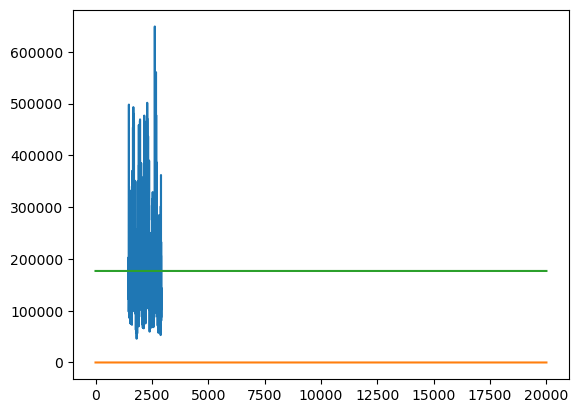

In [8]:
plt.plot(x_train,y_train,pl)
jl,wl,bl = np.array(jl),np.array(wl),np.array(bl)

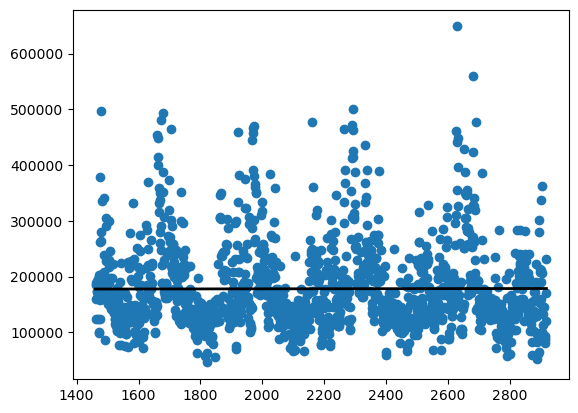

[1461 1462 1463 ... 2917 2918 2919] [177651.00919723 177651.66484326 177652.32048928 ... 178605.62981328
 178606.2854593  178606.94110533] 0.6556460275055288 176693.11035104355


In [7]:
a = y_train - x_train

w_i = 1
b_i = sum(a)/len(a)
w,b,dj_dw,jl,wl,bl,pl = compute_gradient(x_train, y_train,w_i,b_i,0.00000001)#0.00000001
y,t_cost = linear_model(x_train,w,b)
plt.plot(x_train,y,color = "k",linewidth=2)
plt.scatter(x_train,y_train,)
# print(wl,bl,jl)
plt.show()
print(x_train,y,w,b)

In [14]:
test = float(input("enter the size of the house: "))
print("predicted price: ",w*test+b)

enter the size of the house: 123
predicted price:  176773.75481242672
